# Scenario Question 💼
# A telecommunications company has collected data on 500 customers, including their monthly bill amount, average call duration, internet usage, and number of support calls. The company wants to group customers into meaningful segments to design targeted marketing campaigns and improve customer service.
# You are tasked with:
# - Using K‑Means clustering to explore possible customer segments.
# - Applying the Elbow Method to determine where adding more clusters stops giving significant improvement.
# - Using the Silhouette Score to validate which number of clusters produces the most well‑separated and meaningful groups

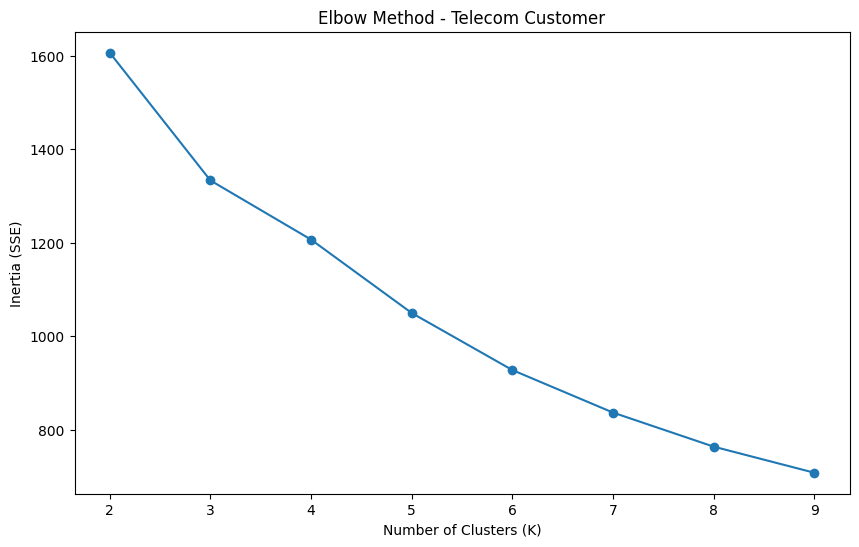

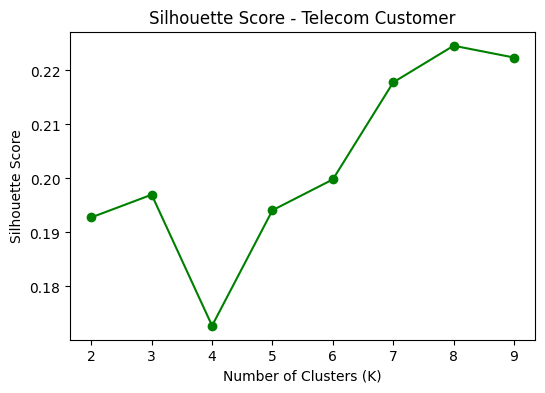

Best number of clusters (K) based on Silhouette Score: 8


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Create synthetic telecom customer dataset
data = {
    'CustomerID': range(1, 501),
    'MonthlyBill': np.random.randint(20, 200, 500),       # monthly bill in $
    'CallDuration': np.random.randint(50, 500, 500),      # avg monthly call minutes
    'InternetUsage': np.random.randint(10, 300, 500),     # GB per month
    'SupportCalls': np.random.randint(0, 10, 500)         # number of support calls
}
df = pd.DataFrame(data)

# Select features
X = df[['MonthlyBill', 'CallDuration', 'InternetUsage', 'SupportCalls']]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Methods
inertia = []
K_range = range(2,10)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10,6))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method - Telecom Customer')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (SSE)')
plt.show()

# Silhouette Score
silhouette_scores = []
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(6,4))
plt.plot(K_range, silhouette_scores, marker='o',color='green')
plt.title('Silhouette Score - Telecom Customer')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

# Print best k suggestion
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f"Best number of clusters (K) based on Silhouette Score: {best_k}")
